In [7]:
# Install dependencies
!pip install -q -U pandas plotly nbformat kaleido


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


Label      Denmark  Finland  Iceland  Norway  Sweden
1971-1975     61.2     59.3     72.1    65.0    67.4
1976-1980     66.1     64.0     75.7    70.2    74.9
1981-1985     66.6     71.4     75.6    73.2    76.6
1986-1990     70.4     77.8     77.1    75.2    80.0
1991-1995     74.5     80.5     80.8    76.8    82.8
1996-2000     78.8     84.3     86.9    84.0    85.5
2001-2005     82.5     86.4     86.1    85.2    86.7
2006-2010     86.2     88.4     89.3    86.5    89.6
2011-2015     89.6     90.2     87.2    89.9    91.7
2016-2020     90.2     90.8     91.2    90.8    92.3


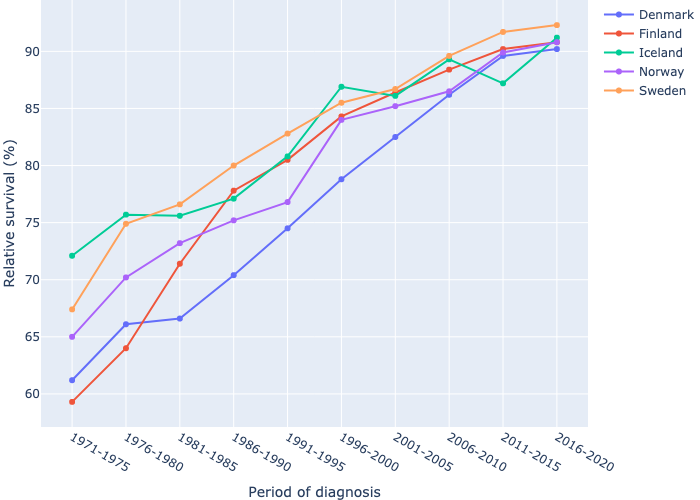

In [8]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np


# load cancer data
data = pd.read_csv("../data/NCdata-5years-survival-trends-pop(578,752,246,208,352)-can(180)-females-p(5).csv", header=0, index_col=0)
data = data.T

print(data)

figures = []
for country in data.columns:
    figures.append(
        go.Scatter(
            name=country,
            x=data.index,
            y=data[country],
            mode='markers+lines',
            showlegend=True,
        )
    )
layout = go.Layout(
    xaxis=dict(
        title="Period of diagnosis"
    ),
    yaxis=dict(
        title="Relative survival (%)"
    )
)

fig = go.Figure(figures, layout=layout)
fig.update_layout(
    margin=go.layout.Margin(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=0  #top margin  <- Need to be adjusted if title is added!
    )
)

fig.show(renderer="png")
fig.write_image("breast_cancer_survival.png")
